In [18]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torchinfo import summary
from tqdm import tqdm
import matplotlib.pyplot as plt

device = "cuda" if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [2]:
class BasicNN(nn.Module):
    def __init__(self, input_size, num_classes):
        super(BasicNN, self).__init__()
        self.fc1 = nn.Linear(input_size, 50)
        self.fc2 = nn.Linear(50, num_classes)
    def forward(self, input_tensor):
        op1 = F.relu(self.fc1(input_tensor))
        return self.fc2(op1)

In [29]:
input_size = 784
num_classes = 10
batch_size = 6
learning_rate = 0.01
num_epochs = 10

In [5]:
training_data = datasets.MNIST(root='datasets/', train = True, transform = transforms.ToTensor(), download = True) 
testing_data = datasets.MNIST(root = 'datasets/', train = False, download = True, transform = transforms.ToTensor())
train_loader = DataLoader(training_data, shuffle = True, batch_size = batch_size)
test_loader = DataLoader(testing_data, shuffle = False, batch_size = batch_size)

In [7]:
model = BasicNN(input_size, num_classes)
loss = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr = learning_rate)

In [9]:
print(model)
print()
print(summary(model, input_size = (batch_size, 1, 784)))

BasicNN(
  (fc1): Linear(in_features=784, out_features=50, bias=True)
  (fc2): Linear(in_features=50, out_features=10, bias=True)
)

Layer (type:depth-idx)                   Output Shape              Param #
BasicNN                                  [6, 1, 10]                --
├─Linear: 1-1                            [6, 1, 50]                39,250
├─Linear: 1-2                            [6, 1, 10]                510
Total params: 39,760
Trainable params: 39,760
Non-trainable params: 0
Total mult-adds (M): 0.24
Input size (MB): 0.02
Forward/backward pass size (MB): 0.00
Params size (MB): 0.16
Estimated Total Size (MB): 0.18


In [12]:
len(train_loader)/ batch_size

1666.6666666666667

In [37]:
model.train()
model.to(device)
total_loss = []
total_accuracy = []
losses = 0
loss_values = 0
correct = 0
for epoch in tqdm(range(num_epochs), desc = "Training Epochs"):
    losses = 0
    correct = 0
    for batch_idx, (data, targets) in enumerate(train_loader):
        loss_values = 0
        data, targets = data.to(device), targets.to(device)
        data = data.reshape(data.shape[0], -1)
        
        outputs = model(data)
        loss_values = loss(outputs, targets)
        correct += (outputs.argmax(1) == targets).sum().item()

        optimizer.zero_grad()
        loss_values.backward()
        optimizer.step()

        losses += loss_values.item()

    total_loss.append(losses/len(train_loader.dataset))
    total_accuracy.append(correct/len(train_loader.dataset))

Training Epochs: 100%|██████████| 10/10 [06:26<00:00, 38.64s/it]


Text(0, 0.5, 'Loss')

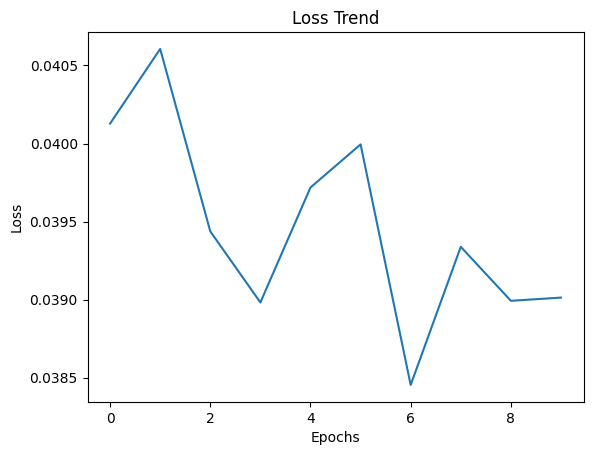

In [38]:
plt.plot(range(num_epochs), total_loss)
plt.title("Loss Trend")
plt.xlabel("Epochs")
plt.ylabel("Loss")

Text(0, 0.5, 'Accuracy')

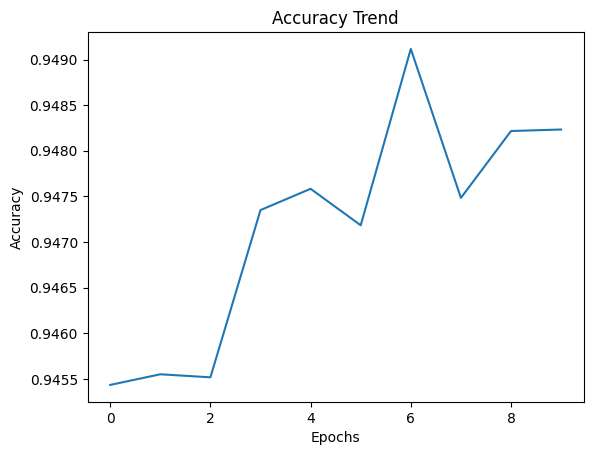

In [39]:
plt.plot(range(num_epochs), total_accuracy)
plt.title("Accuracy Trend")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

In [44]:
model.eval()
losses = 0
correct = 0
loss_batch = 0
model.to(device)
with torch.no_grad():
    for batch_idx, (data, targets) in enumerate(test_loader):
        data, targets = data.to(device), targets.to(device)
        data = data.reshape(data.shape[0], -1)

        outputs = model(data)
        loss_batch = loss(outputs, targets)

        losses += loss_batch.item()
        correct += (outputs.argmax(1) == targets).sum().item()

print(f"Loss: {losses/len(test_loader.dataset)} | Accuracy: {(correct/len(test_loader.dataset)) * 100}")

Loss: 0.09506466118191306 | Accuracy: 93.35
